In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

In [2]:
data = pd.read_csv("binary.csv")
data

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [3]:
target = data["admit"]
x_inputs = data[["gre","gpa"]]

In [4]:
weights = np.random.normal(size=3)
weights

array([-0.94731166, -0.86338642, -1.07070515])

In [5]:
def σ(instance,weights):
    input_w_bias = np.append(1, instance)
    return 1/(1+np.exp(-1*np.dot(weights,input_w_bias)))

In [6]:
rand_instance = x_inputs.iloc[np.random.randint(len(data))]
σ(rand_instance,weights)

2.2872787497569518e-250

In [7]:
def cost_function(data,weights):
    target = data["admit"]
    x_inputs = data[["gre","gpa"]]
    m = len(data)
    return -1/m*sum([target[x]*np.log(σ(x_inputs.iloc[x],weights))+
                     (1-target[x])*np.log(1-σ(x_inputs.iloc[x],weights))
                     for x in target])

In [8]:
cost_function(data,weights)

182.47100918141908

In [9]:
(1-target[1])*np.log10(1-σ(x_inputs.iloc[1],weights))

0.0

In [10]:
def gradient_L(data,weights):
    m = len(data)
    target = data["admit"]
    x_inputs = data[["gre","gpa"]]
    w1 = sum([σ(x_inputs.iloc[x],weights)-target[x]*weights[0] for x in target])*1/m
    w2 = sum([σ(x_inputs.iloc[x],weights)-target[x]*weights[1] for x in target])*1/m
    w3 = sum([σ(x_inputs.iloc[x],weights)-target[x]*weights[2] for x in target])*1/m
    return np.array([w1,w2,w3])

In [11]:
gradient_L(data,weights)

array([0.30077145, 0.27412519, 0.33994888])

In [12]:
cost_history = []
α = 0.125
m = len(data)
i = 1
while i < 100 and cost_function(data,weights) < 0.001:
    weights -= α*gradient_L(data,weights)
    cost_history.append(tuple((cost_function(data,weights),i)))
    i += 1

In [13]:
weights

array([-0.94731166, -0.86338642, -1.07070515])

So after some research it has become apparent that the extremely positive and negative values produced from the logarithm functions will return infinity. Once infinity is reached it will return a **NaN** value. To correct for this we normalize our data using this formula.

$$x_{new} = x_i - x_{min} / x_{max} - x_{min}$$

In [14]:
def normalize(data_column):
    a = data_column.describe()
    x_min = a.loc["min"]
    x_max = a.loc["max"]
    x_new = [(x - x_min)/(x_max-x_min) for x in data_column]
    return x_new

In [15]:
x_inputs = x_inputs.apply(normalize,axis=0)
new_df = pd.merge(target,x_inputs,left_index=True,right_index=True)
new_df

,admit,gre,gpa
0,0,0.275862,0.775862
1,1,0.758621,0.810345
2,1,1.000000,1.000000
3,1,0.724138,0.534483
4,0,0.517241,0.385057
...,...,...,...
395,0,0.689655,1.000000
396,0,0.586207,0.448276
397,0,0.413793,0.212644
398,0,0.827586,0.798851


In [16]:
cost_function(new_df,weights)

0.8953052927302934

In [17]:
gradient_L(new_df,weights)

array([0.405736  , 0.37908974, 0.44491344])

In [18]:
cost_history = []
α = 0.1
m = len(new_df)
i = 1
while cost_function(new_df,weights) >= 0.001 and i < 100:
    weights -= α*gradient_L(new_df,weights)
    cost_history.append(tuple((cost_function(new_df,weights),i)))
    i += 1

Text(0.5, 1.0, 'Cost History')

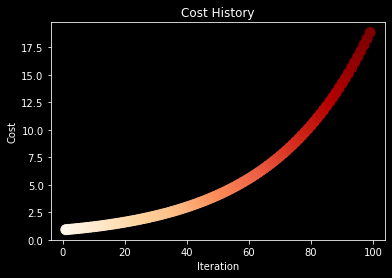

In [19]:
x,y = zip(*cost_history)
plt.scatter(y,x,c=y,s=100,cmap=plt.cm.OrRd)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title('Cost History')